In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
sns.set(font_scale=1.5)
p = sns.color_palette("Set2")
sns.palplot(p)
sns.set_palette(p)
cmap = plt.cm.get_cmap('Spectral')
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 3})

In [3]:
IMG_FOLDER = './Tmp/'

### BASIC GAN

In [4]:
filename = './Logs/log_gan.csv'
col_names = ['epoch', 'd_loss', 'acc', 'acc_real', 'acc_fake', 'g_loss']
df = pd.read_csv(filename, delimiter=';', names=col_names)
#df = df[df.epoch % 10 == 0]
df.head()

,epoch,d_loss,acc,acc_real,acc_fake,g_loss
0,100,0.085671,99.357140,98.714286,100.000000,3.164042
1,200,0.735944,73.928571,48.285714,99.571431,1.649126
2,300,0.624692,50.000000,0.000000,100.000000,0.695891
3,400,0.613552,50.642860,1.285714,100.000000,0.712239
4,500,0.629804,50.071430,0.142857,100.000000,0.709957


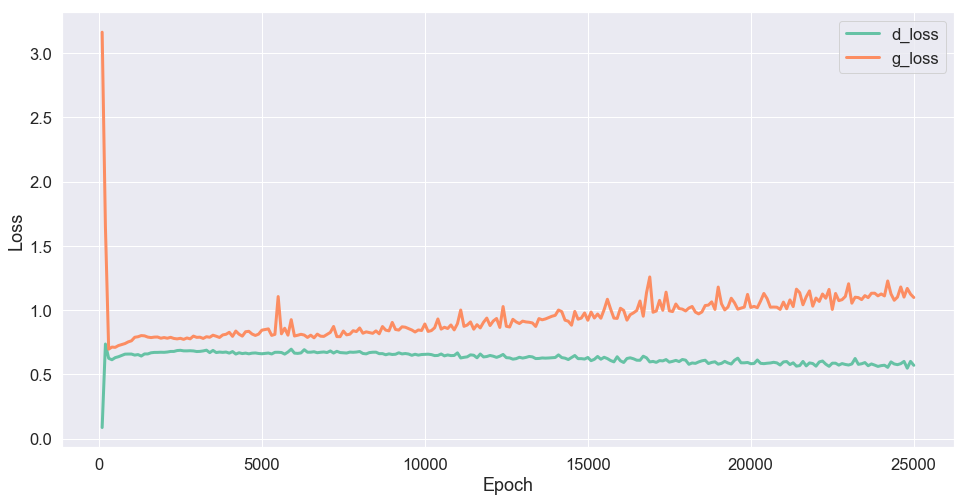

In [5]:
fig = plt.figure(figsize=(16, 8), frameon=False)
fig.set_size_inches(16, 8)
sns.lineplot(data=df, x='epoch', y='d_loss', label='d_loss')
rgba = cmap(0.3)
s = sns.lineplot(data=df, x='epoch', y='g_loss', label='g_loss')
s.set_ylabel('Loss')
s.set_xlabel('Epoch')
plt.savefig(IMG_FOLDER + 'gan-basic-loss.png', bbox_inches='tight', pad_inches=0)
plt.show()

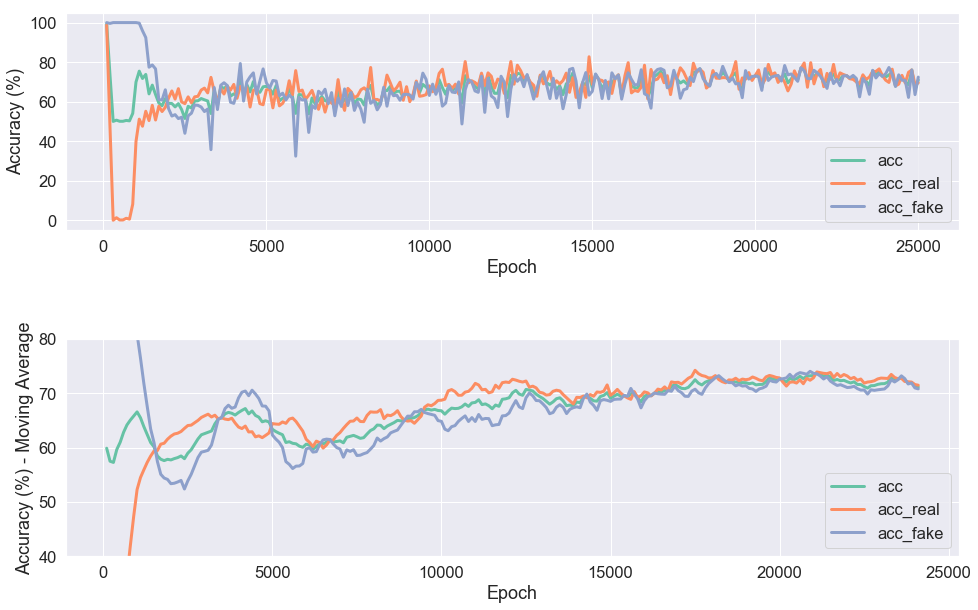

In [23]:
fig = plt.figure(figsize=(16, 10))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.5)
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)
sns.lineplot(data=df, x='epoch', y='acc', label='acc', ax=ax1)
sns.lineplot(data=df, x='epoch', y='acc_real', label='acc_real', ax=ax1)
s = sns.lineplot(data=df, x='epoch', y='acc_fake', label='acc_fake', ax=ax1)
s.set_ylabel('Accuracy (%)')
s.set_xlabel('Epoch')

# With moving average
N = 10
new_acc = np.convolve(df['acc'], np.ones((N,))/N, mode='valid')
new_acc_real = np.convolve(df['acc_real'], np.ones((N,))/N, mode='valid')
new_acc_fake = np.convolve(df['acc_fake'], np.ones((N,))/N, mode='valid')

sns.lineplot(data=df, x=df.epoch[:241], y=new_acc, label='acc', ax=ax2)
sns.lineplot(data=df, x=df.epoch[:241], y=new_acc_real, label='acc_real', ax=ax2)
s = sns.lineplot(data=df, x=df.epoch[:241], y=new_acc_fake, label='acc_fake', ax=ax2)
s.set_ylabel('Accuracy (%) - Moving Average')
s.set_xlabel('Epoch')
s.set_ylim(40, 80)
plt.savefig(IMG_FOLDER + 'vgan-acc.png', bbox_inches='tight', pad_inches=0)
plt.show()

### DCGAN / AAE

In [24]:
filename = './Logs/log_dcgan_rms.csv'
#filename = './Logs/log_aae.csv'
col_names = ['epoch', 'd_loss', 'acc', 'acc_real', 'acc_fake', 'g_loss']
df = pd.read_csv(filename, delimiter=';', names=col_names)
#df = df[df.epoch % 100 == 0]
df.head()

,epoch,d_loss,acc,acc_real,acc_fake,g_loss
0,1,24.282057,20.312500,3.90625,36.71875,-0.843120
1,5,9.692862,21.875000,1.56250,42.18750,-0.844201
2,10,1.891726,19.921875,0.00000,39.84375,-0.796996
3,15,-0.214060,21.484375,0.78125,42.18750,-0.803785
4,20,-1.360626,22.656250,0.00000,45.31250,-1.004420


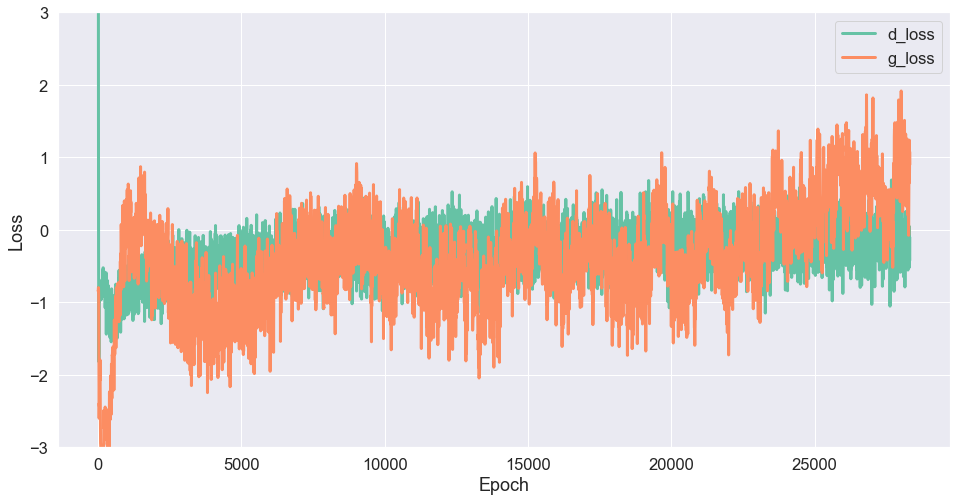

In [25]:
fig = plt.figure(figsize=(16, 8), frameon=False)
fig.set_size_inches(16, 8)
sns.lineplot(data=df, x='epoch', y='d_loss', label='d_loss')
rgba = cmap(0.3)
s = sns.lineplot(data=df, x='epoch', y='g_loss', label='g_loss')
s.set_ylabel('Loss')
s.set_xlabel('Epoch')
s.set_ylim(-3, 3)
plt.savefig(IMG_FOLDER + 'dcgan-loss.png', bbox_inches='tight', pad_inches=0)
plt.show()

In [34]:
# With moving average
N = 500
#N = 10
new_d_loss = np.convolve(df['d_loss'], np.ones((N,))/N, mode='same')
new_g_loss = np.convolve(df['g_loss'], np.ones((N,))/N, mode='same')

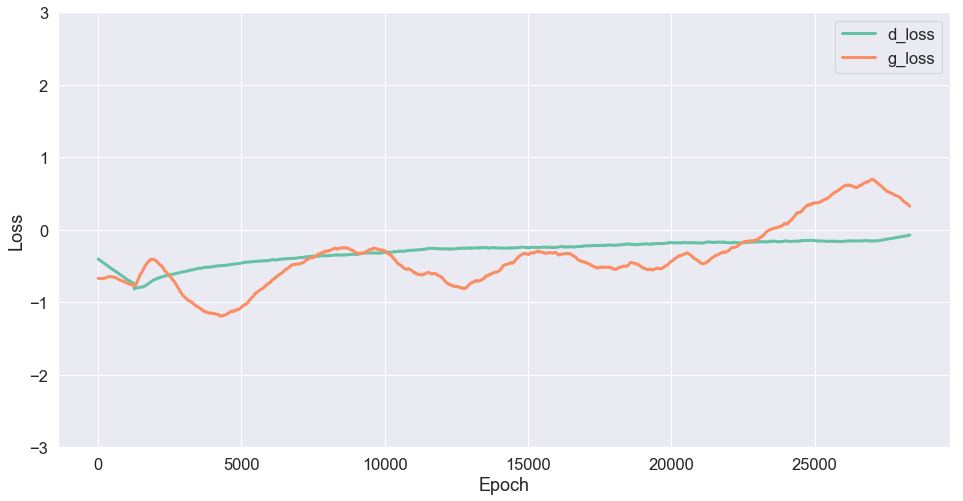

In [35]:
fig = plt.figure(figsize=(16, 8), frameon=False)
fig.set_size_inches(16, 8)
sns.lineplot(data=df, x='epoch', y=new_d_loss, label='d_loss')
rgba = cmap(0.3)
s = sns.lineplot(data=df, x='epoch', y=new_g_loss, label='g_loss')
s.set_ylabel('Loss')
s.set_xlabel('Epoch')
s.set_ylim(-3, 3)
plt.savefig(IMG_FOLDER + 'dcgan-loss-ma.png', bbox_inches='tight', pad_inches=0)
plt.show()

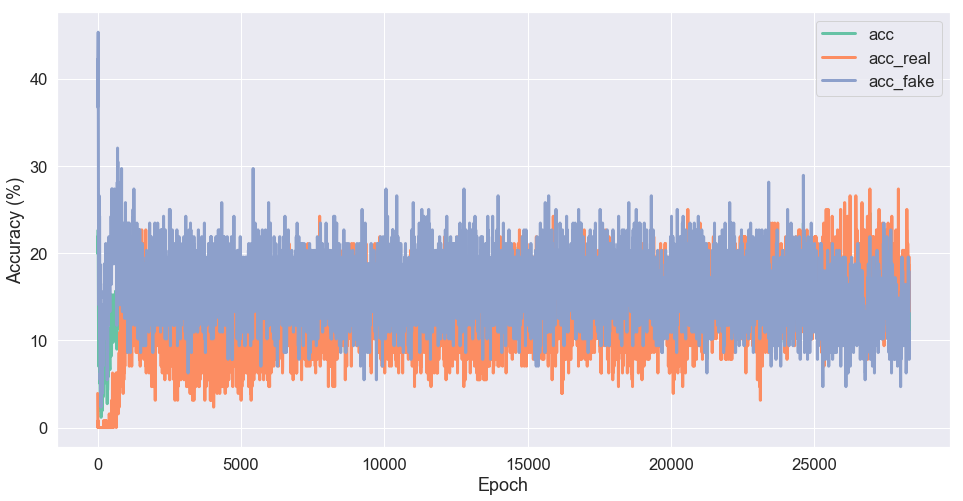

In [28]:
plt.figure(figsize=(16, 8))
sns.lineplot(data=df, x='epoch', y='acc', label='acc')
sns.lineplot(data=df, x='epoch', y='acc_real', label='acc_real')
s = sns.lineplot(data=df, x='epoch', y='acc_fake', label='acc_fake')
s.set_ylabel('Accuracy (%)')
s.set_xlabel('Epoch')
plt.savefig(IMG_FOLDER + 'dcgan-acc.png', bbox_inches='tight', pad_inches=0)
plt.show()

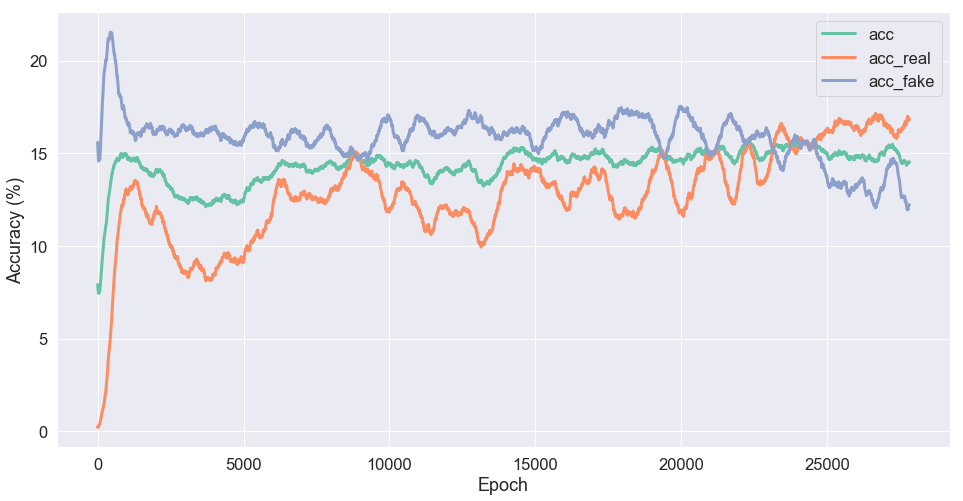

In [29]:
# With moving average
N = 100
new_acc = np.convolve(df['acc'], np.ones((N,))/N, mode='valid')
new_acc_real = np.convolve(df['acc_real'], np.ones((N,))/N, mode='valid')
new_acc_fake = np.convolve(df['acc_fake'], np.ones((N,))/N, mode='valid')
max_i = len(df.epoch) - N + 1
plt.figure(figsize=(16, 8))
sns.lineplot(data=df, x=df.epoch[:max_i], y=new_acc, label='acc')
sns.lineplot(data=df, x=df.epoch[:max_i], y=new_acc_real, label='acc_real')
s = sns.lineplot(data=df, x=df.epoch[:max_i], y=new_acc_fake, label='acc_fake')
s.set_ylabel('Accuracy (%)')
s.set_xlabel('Epoch')
plt.savefig(IMG_FOLDER + 'dcgan-acc-ma.png', bbox_inches='tight', pad_inches=0)
plt.show()